In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [41]:
df = pd.read_csv("/content/kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.shape

(400, 26)

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
#converting of categorical column in numerical column

df["rbc"].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder

ob1= OneHotEncoder(sparse_output=False,handle_unknown = "ignore")
encoded_data=ob1.fit_transform(df[["rbc"]])
encoded_df =pd.DataFrame(encoded_data,columns=ob1.get_feature_names_out(["rbc"]))

encoded_df

,rbc_abnormal,rbc_normal,rbc_nan
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
395,0.0,1.0,0.0
396,0.0,1.0,0.0
397,0.0,1.0,0.0
398,0.0,1.0,0.0


In [19]:
df = pd.concat([df,encoded_df])
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,classification,rbc_abnormal,rbc_normal,rbc_nan
0,0.0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,yes,yes,no,good,no,no,ckd,NaN,NaN,NaN
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,no,no,no,good,no,no,ckd,NaN,NaN,NaN
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,no,yes,no,poor,no,yes,ckd,NaN,NaN,NaN
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,yes,no,no,poor,yes,yes,ckd,NaN,NaN,NaN
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,ckd,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [24]:
df.drop("rbc",axis=1)

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,classification,rbc_abnormal,rbc_normal,rbc_nan
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,yes,yes,no,good,no,no,ckd,NaN,NaN,NaN
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,no,no,no,good,no,no,ckd,NaN,NaN,NaN
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,no,yes,no,poor,no,yes,ckd,NaN,NaN,NaN
3,3.0,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,yes,no,no,poor,yes,yes,ckd,NaN,NaN,NaN
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,no,no,no,good,no,no,ckd,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [26]:
df["appet"].unique()

array(['good', 'poor', nan], dtype=object)

In [33]:
#distributing between categrical column and numerical column

categorical = [i for i in df.columns if df[i].dtype == "object"]
numerical = [i for i in df.columns if (df[i].dtype != "object")]
categorical

numerical


['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'rbc_abnormal',
 'rbc_normal',
 'rbc_nan']

# DATA VISUALISATION




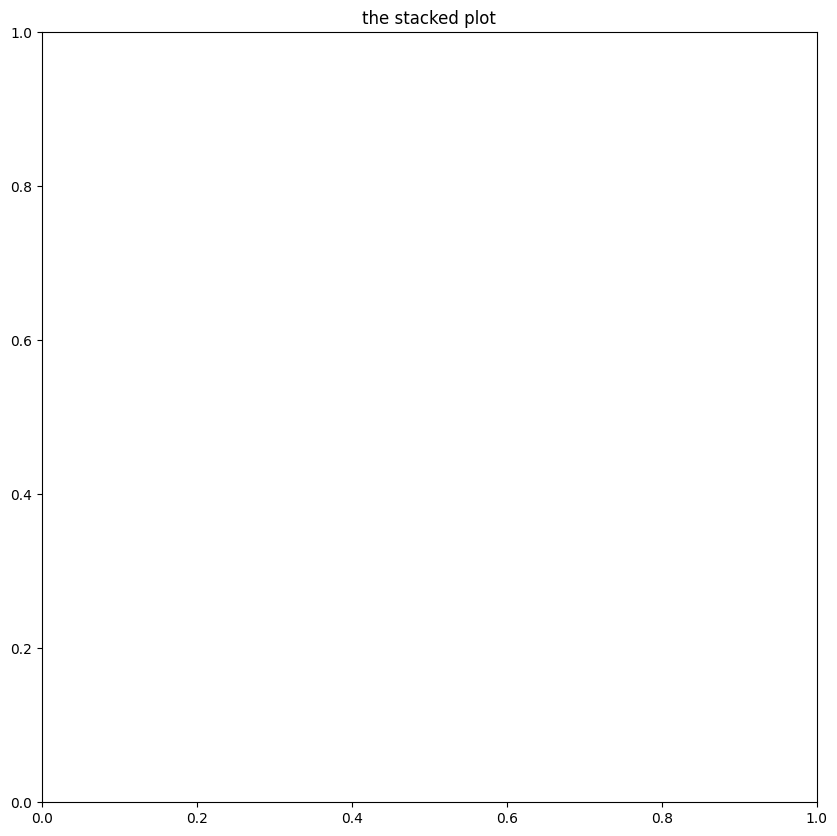

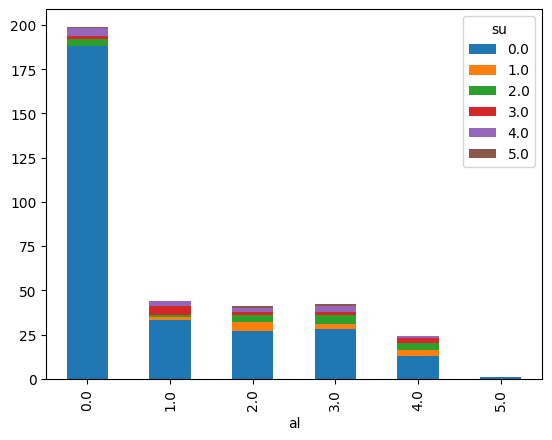

In [38]:


plt.figure(figsize =(10,10))
plt.title("the stacked plot")

al_su = pd.crosstab(df["al"],df["su"])
al_su.plot(kind = "bar",stacked =True)
plt.show()
